<a href="https://colab.research.google.com/github/MarcinAn/wizualizacja/blob/main/wizualizacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).**

In [467]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')

In [468]:
import matplotlib.pyplot as plt
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

# **Sodzaj regularyzacji: l2**
# **Stopień regularyzacji: 0.5**

In [469]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30)

In [471]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized_l2 = scaler_2var.fit_transform(X_train)
X_test_standardized_l2 = scaler_2var.transform(X_test)
model_lr_l2 = LogisticRegression(penalty='l2', C=0.5)
model_lr_l2.fit(X_train_standardized_l2, y_train)

LogisticRegression(C=0.5)

<ipython-input-468-b10ee9ae8b0e>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


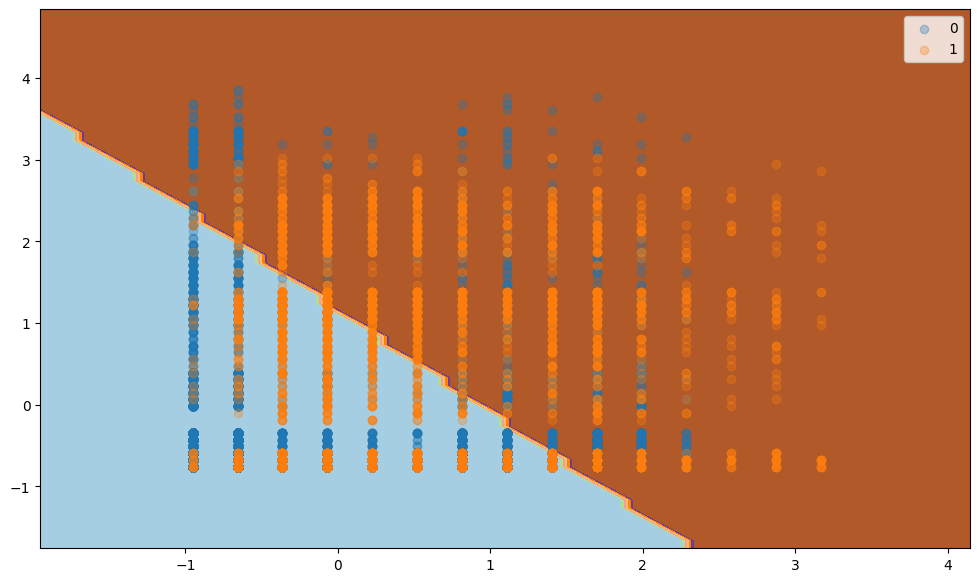

In [472]:
plot_classification_surface(X_plot=X_train_standardized_l2, y_plot=y_train, trained_model=model_lr_l2)

In [473]:
predictions_lr_train = model_lr_l2.predict(X_train_standardized_l2)
predictions_lr_test = model_lr_l2.predict(X_test_standardized_l2)

In [474]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("F1_score train:", f1_score(y_train, predictions_lr_train))
print("F1_score test:", f1_score(y_test, predictions_lr_test))

F1_score train: 0.5502901353965184
F1_score test: 0.5642414860681114


# **Sodzaj regularyzacji: l1**
# **Stopień regularyzacji: 0.2**

In [475]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30)

In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized_l1 = scaler_2var.fit_transform(X_train)
X_test_standardized_l1 = scaler_2var.transform(X_test)
model_lr_l1 = LogisticRegression(penalty='l1', C=0.2, solver='saga')
model_lr_l1.fit(X_train_standardized_l1, y_train)

LogisticRegression(C=0.2, penalty='l1', solver='saga')

<ipython-input-468-b10ee9ae8b0e>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


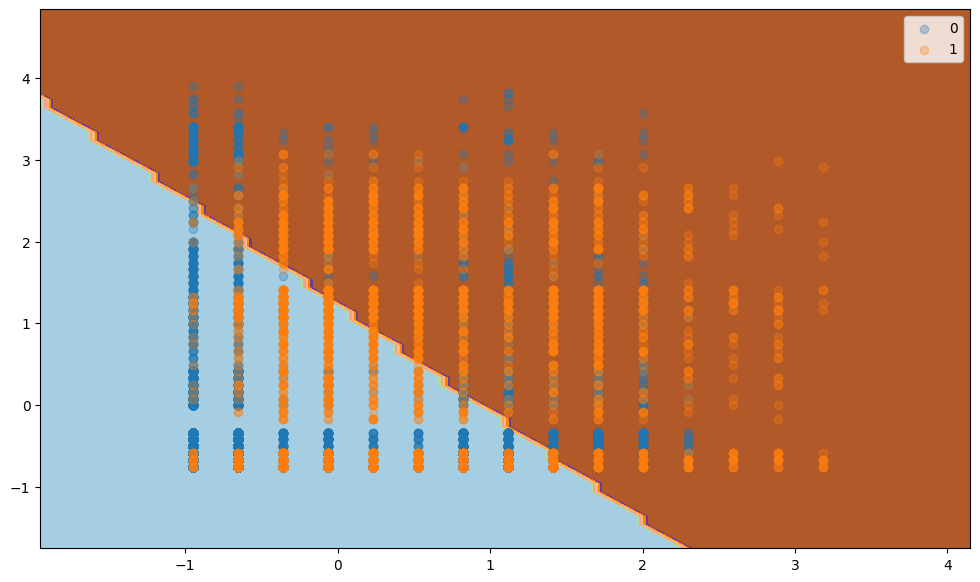

In [478]:
plot_classification_surface(X_plot=X_train_standardized_l1, y_plot=y_train, trained_model=model_lr_l1)

In [479]:
predictions_lr_train = model_lr_l1.predict(X_train_standardized_l1)
predictions_lr_test = model_lr_l1.predict(X_test_standardized_l1)

In [480]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("F1_score train:", f1_score(y_train, predictions_lr_train))
print("F1_score test:", f1_score(y_test, predictions_lr_test))

F1_score train: 0.5522676101640399
F1_score test: 0.5645100264850548


# **Sodzaj regularyzacji: None**
# **Stopień regularyzacji: 0.01**

In [481]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [482]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30)

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized_none = scaler_2var.fit_transform(X_train)
X_test_standardized_none = scaler_2var.transform(X_test)
model_lr_none = LogisticRegression(penalty=None, solver='saga')
model_lr_none.fit(X_train_standardized_none, y_train)

LogisticRegression(penalty=None, solver='saga')

<ipython-input-468-b10ee9ae8b0e>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


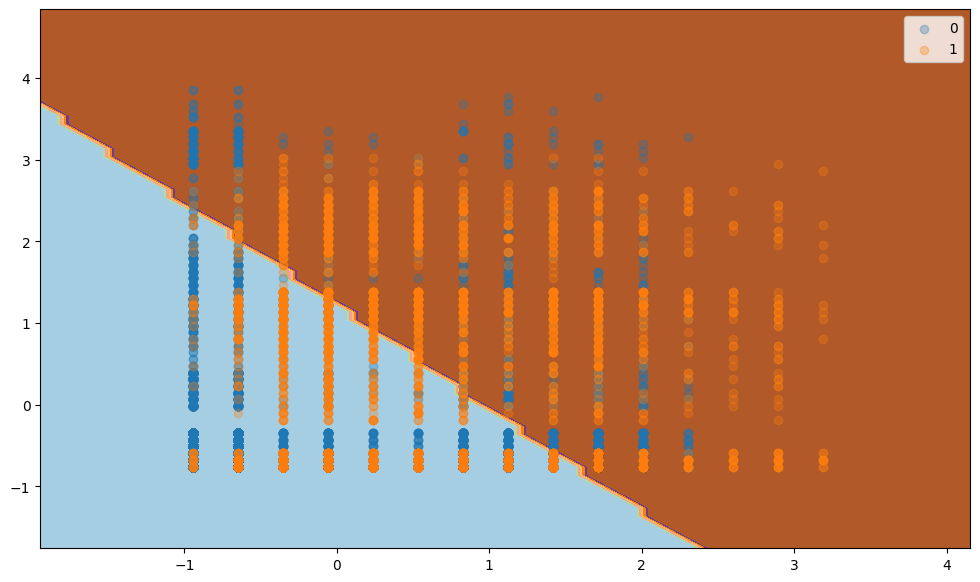

In [484]:
plot_classification_surface(X_plot=X_train_standardized_none, y_plot=y_train, trained_model=model_lr_none)

In [485]:
predictions_lr_train = model_lr_none.predict(X_train_standardized_none)
predictions_lr_test = model_lr_none.predict(X_test_standardized_none)

In [486]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("F1_score train:", f1_score(y_train, predictions_lr_train))
print("F1_score test:", f1_score(y_test, predictions_lr_test))

F1_score train: 0.5539311241065626
F1_score test: 0.5553442373526055
